1


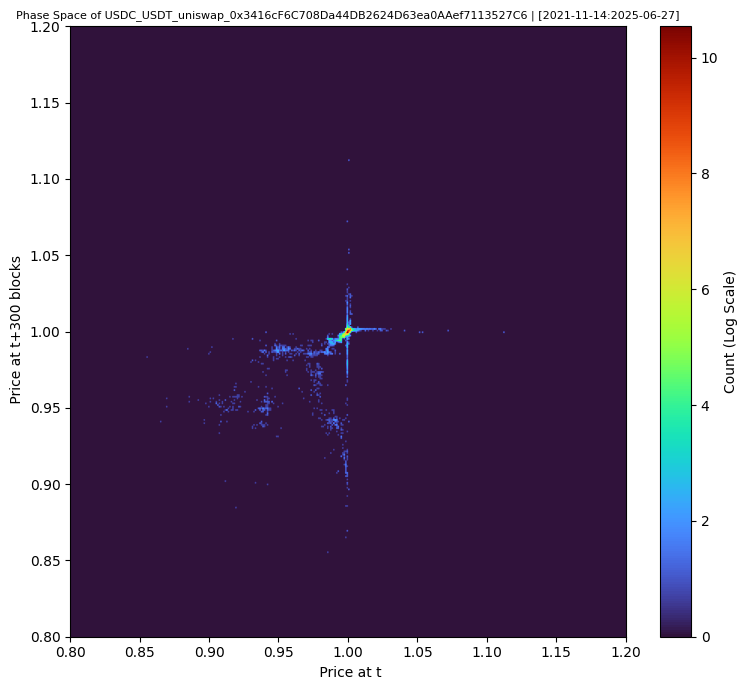

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import powerlaw

"""
Phase space for observing price dynamics across time.
Outputs phase space based on number of block intervals specified by lag_delta
e.g. lag_delta=5 means take a snapshot every 5 blocks (1 minute) and output 60 times (n_lags=60)

Stablecoin pools:
    USDC_DAI_uniswap_0x5777d92f208679DB4b9778590Fa3CAB3aC9e2168
    USDT_DAI_uniswap_0x48da0965ab2d2cbf1c17c09cfb5cbe67ad5b1406
    USDC_USDT_uniswap_0x3416cF6C708Da44DB2624D63ea0AAef7113527C6   
"""

title='USDC_USDT_uniswap_0x3416cF6C708Da44DB2624D63ea0AAef7113527C6'
df_pool = pd.read_csv('data_euler/'+title+'.csv') #link to the folder containing the pool data
df_pool['evt_block_time'] = pd.to_datetime(df_pool['evt_block_time'], utc=True)
df = df_pool
column_select='price'
df['Price'] = pd.to_numeric(df[column_select], errors='coerce')
df['Returns'] = df[column_select].pct_change(1)  # Daily percentage change
df['Date'] = df_pool['evt_block_time']

t_0=df['Date'].iloc[0].strftime('%Y-%m-%d')
t_f=df['Date'].iloc[-1].strftime('%Y-%m-%d')

t_0name=df['Date'].min()
t_fname=df['Date'].max()
       
returns=df['Returns'].dropna().replace([np.inf, -np.inf], np.nan)[1:]

phase_data=df['Price'] #df['Returns'].dropna().replace([np.inf, -np.inf], np.nan)[1:]
n_bins = 1000  # Number of bins for the histogram / Pixel Granularity
n_lags = 60 #umber of lags to iterate over
lag_delta=5

plt.figure(figsize=(8, 7))
for lag in range(1, n_lags + 1):   
    x = phase_data[:-lag_delta*lag]  # Current values of x
    y = phase_data[lag_delta*lag:]   # Values of y at lag   
    hist, xedges, yedges = np.histogram2d(x, y, bins=n_bins)    
    plt.imshow(np.log1p(hist.T), origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
               aspect='auto', cmap='turbo', alpha=1) # RdBu    
    plt.xlabel(f' Price at t')
    plt.ylabel(f' Price at t+{lag_delta*lag} blocks')
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.xlim(bound_lower,bound_upper)
    #plt.ylim(bound_lower,bound_upper)
    plt.xlim(.8,1.2)
    plt.ylim(.8,1.2)
    
    plt.title(f'Phase Space of {title} | [{t_0}:{t_f}]', fontsize=8)
    plt.tight_layout()
    #plt.savefig(f'data_euler/video_phase_test/{lag}.jpg', dpi=250, bbox_inches='tight')
    
plt.colorbar(label='Count (Log Scale)')
plt.show()